**Install required libraries**

In [1]:
!pip install statsmodels

**Import the required libraries**

In [ ]:
from google.colab import files
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

**Upload the Dataset ZIP File and Extract it**

In [2]:
uploaded = files.upload()

zip_file = 'individual+household+electric+power+consumption.zip'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('/content')

extracted_files = os.listdir('/content')
extracted_files

Saving individual+household+electric+power+consumption.zip to individual+household+electric+power+consumption (1).zip


['.config',
 'household_power_consumption.txt',
 'individual+household+electric+power+consumption (1).zip',
 'individual+household+electric+power+consumption.zip',
 'sample_data']

**Load the Dataset**

In [3]:
file_path = '/content/household_power_consumption.txt'

# Loading the data & parsing date and time columns
df = pd.read_csv(file_path, sep=';',
                 parse_dates={'datetime': ['Date', 'Time']},
                 dayfirst=True,
                 na_values='?',
                 low_memory=False)

df.head()

<ipython-input-3-51cbf2f9662f>:8: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(file_path, sep=';',


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


**Preprocess the time-series data and handle any missing values**

In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

df.isnull().sum()
df.fillna(method='ffill', inplace=True)

df.isnull().sum()

<ipython-input-4-eed34ac19001>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # or df.interpolate(method='linear', inplace=True)


,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


**Visualize the Global Active Power over Time**

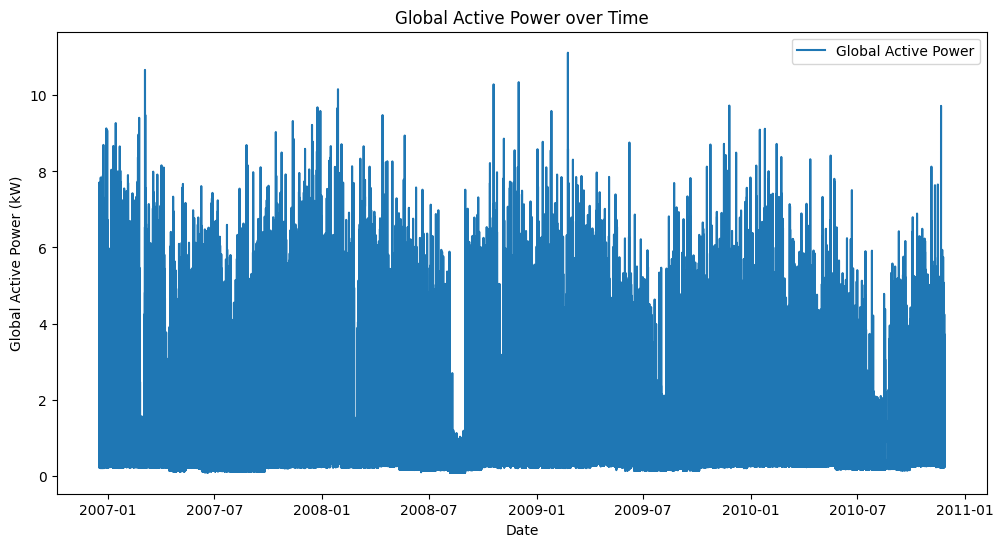

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.086168e+00,1.233280e-01,2.408416e+02,4.604226e+00,1.110995e+00,1.287958e+00,6.416570e+00
std,1.053172e+00,1.125144e-01,3.235574e+00,4.426775e+00,6.115908e+00,5.786865e+00,8.419505e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.390000e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.980000e-01,1.000000e-01,2.410200e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.524000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Global_active_power'], label='Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.title('Global Active Power over Time')
plt.legend()
plt.show()

df.describe()

**Feature Engineering (Extract Year, Month, Day, Hour, and Weekday)**

In [6]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday

df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,hour,weekday
datetime,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,5
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,5
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,5
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,5
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,5


**Splitting the Data into Training and Testing Sets**

In [7]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

train.shape, test.shape

((1660207, 12), (415052, 12))

**Training ARIMA Model**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


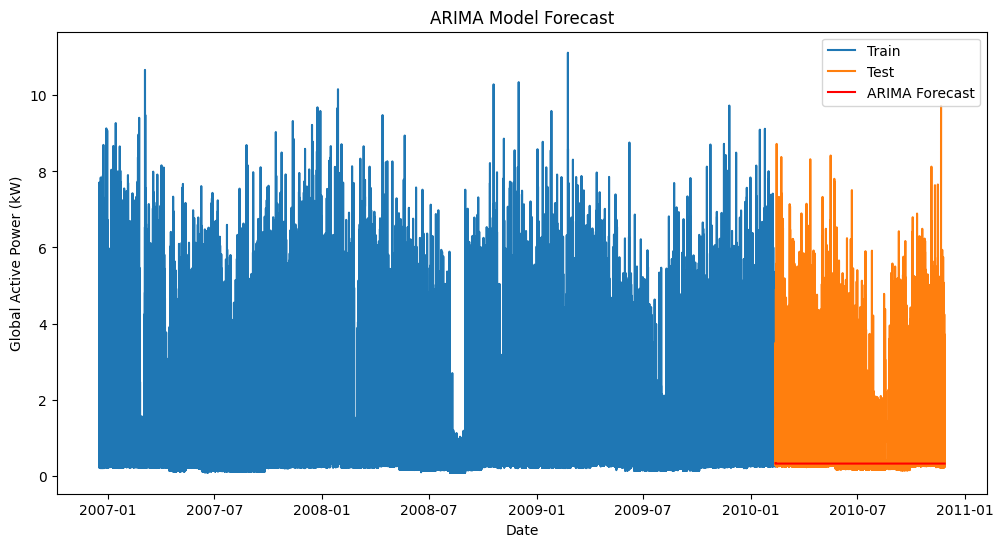

In [8]:
train_series = train['Global_active_power']

model = ARIMA(train_series, order=(5, 1, 0))
model_fit = model.fit()

#Forecast on the test data and plotting the results
forecast = model_fit.forecast(steps=len(test), alpha=0.05)

plt.figure(figsize=(12, 6))
plt.plot(train_series.index, train_series, label='Train')
plt.plot(test.index, test['Global_active_power'], label='Test')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

**Evaluate the ARIMA Model Performance**

In [9]:
mae = mean_absolute_error(test['Global_active_power'], forecast)
rmse = np.sqrt(mean_squared_error(test['Global_active_power'], forecast))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.7082710343370732
Root Mean Squared Error (RMSE): 1.1072213163061577


**Forecast Future Energy Consumption for the Next 30 Days**

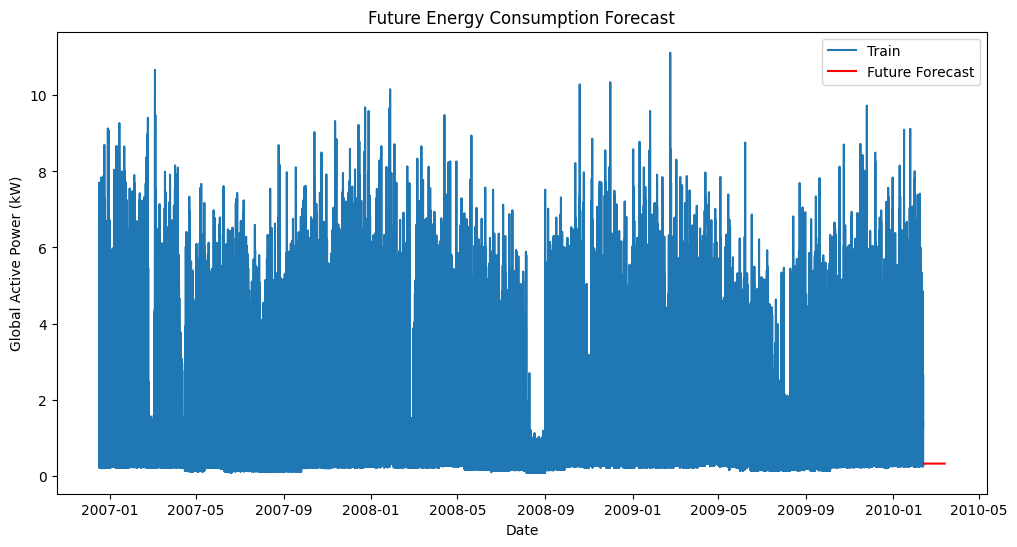

Forecast for the next 30 days:
2010-02-11 15:31:00    0.323251
2010-02-11 15:32:00    0.314994
2010-02-11 15:33:00    0.312534
2010-02-11 15:34:00    0.313567
2010-02-11 15:35:00    0.315880
2010-02-11 15:36:00    0.316939
2010-02-11 15:37:00    0.316943
2010-02-11 15:38:00    0.316534
2010-02-11 15:39:00    0.316218
2010-02-11 15:40:00    0.316127
2010-02-11 15:41:00    0.316183
2010-02-11 15:42:00    0.316260
2010-02-11 15:43:00    0.316298
2010-02-11 15:44:00    0.316297
2010-02-11 15:45:00    0.316282
2010-02-11 15:46:00    0.316271
2010-02-11 15:47:00    0.316268
2010-02-11 15:48:00    0.316270
2010-02-11 15:49:00    0.316273
2010-02-11 15:50:00    0.316274
2010-02-11 15:51:00    0.316274
2010-02-11 15:52:00    0.316274
2010-02-11 15:53:00    0.316273
2010-02-11 15:54:00    0.316273
2010-02-11 15:55:00    0.316273
2010-02-11 15:56:00    0.316273
2010-02-11 15:57:00    0.316273
2010-02-11 15:58:00    0.316273
2010-02-11 15:59:00    0.316273
2010-02-11 16:00:00    0.316273
Freq: min

In [12]:
forecast_steps = 30  # for 30 days of future prediction
forecast_values = model_fit.forecast(steps=forecast_steps)

last_date = train_series.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='D')[1:]

plt.figure(figsize=(12, 6))
plt.plot(train_series.index, train_series, label='Train')
plt.plot(forecast_dates, forecast_values, label='Future Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.title('Future Energy Consumption Forecast')
plt.legend()
plt.show()

print("Forecast for the next 30 days:")
print(forecast_values)